<a href="https://colab.research.google.com/github/samruddhichitnis02/Gamma_Correction/blob/main/Gamma_Correction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


What is Gamma Correction and when to use it?

Gamma Correction  also called as power low transform can be used to manipulate the brightness of an image

How to do that?

Well there is an equation which helps us do this and it is

 O = I ^ (1 / G)

 where O is the output (gamma corrected image),
        I is the input image,
        G is our gamma value.

But before applying this equation directly to our image we need to scale down the intensity of our input image

First we need to scale the image intensity from 0-255 to 0-1 and then we can apply this equation to get the gamma corrected output

In [2]:
from __future__ import print_function
import numpy as np
import argparse
import cv2
import matplotlib.pyplot as plt


In [3]:
def adjust_gamma(image, gamma=1.0):
	invGamma = 1.0 / gamma
  
	table = np.array([((i / 255.0) ** invGamma) * 255
		for i in np.arange(0, 256)]).astype("uint8")
	
	return cv2.LUT(image, table)

In [4]:
original = cv2.imread('/content/drive/My Drive/Colab Notebooks/example_01.png')


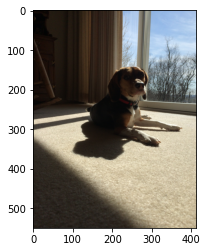

In [5]:
plt.imshow(cv2.cvtColor(original, cv2.COLOR_BGR2RGB))
plt.show()

In [7]:
for gamma in np.arange(0.0, 3.5, 0.5):
	
	if gamma == 1:
		continue
	
	gamma = gamma if gamma > 0 else 0.1
	adjusted = adjust_gamma(original, gamma=gamma)

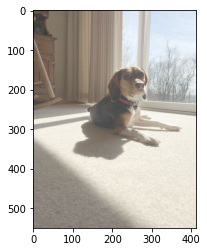

In [8]:
plt.imshow(cv2.cvtColor(adjusted, cv2.COLOR_BGR2RGB))
plt.show()

You can see the difirence between the original image and the gamma corrected image, the darker areas in the images are comparitively lighter now

Note you can check for gamma value and assign the gamma value accordingly and play or try with different gamma values